<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/CN/CNN_with_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow-gpu -U

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense,  Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [8]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [9]:
K = len(set(y_train))
print(f"number of classes:{K}")

number of classes:10


In [10]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu' )(i)
x = Conv2D(64, (3,3), strides=2, activation='relu' )(x)
x = Conv2D(128, (3,3), strides=2, activation='relu' )(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [11]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5051 - accuracy: 0.4548 - val_loss: 1.2277 - val_accuracy: 0.5558
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1793 - accuracy: 0.5792 - val_loss: 1.0593 - val_accuracy: 0.6282
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0257 - accuracy: 0.6348 - val_loss: 0.9948 - val_accuracy: 0.6462
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9143 - accuracy: 0.6760 - val_loss: 0.9612 - val_accuracy: 0.6641
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8166 - accuracy: 0.7109 - val_loss: 0.9012 - val_accuracy: 0.6796
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7364 - accuracy: 0.7386 - val_loss: 0.8696 - val_accuracy: 0.6959
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6635 - accuracy: 0.7636 - val_loss: 0.8604 - val_ac

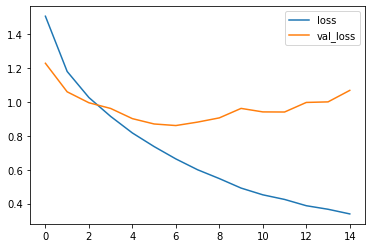

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

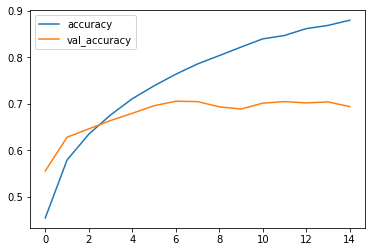

In [13]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()